# Part II - Ford GoBike System
## by Amani Bouguel

## Investigation Overview


>In this analysis, I focused on the users behaviour in order to find out some ways to make the system more popular in the future. 
>I compaed the usage rate of different users types and gender to the ride duration. This will help to provide a better and different sevices based on the user type and gender. 

## Dataset Overview

> The datasset contains information about individual trips made in a bike-sharing system covering the greater San Francisco Bay Area in February 2019. I chose this dataset for its important ecological impact. It would help to get a greener environment.
>The dataset is composed originally  before cleaning of 183412 rows and 16 columns. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('clean201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174572 entries, 0 to 174571
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               174572 non-null  int64  
 1   duration_sec             174572 non-null  int64  
 2   start_time               174572 non-null  object 
 3   end_time                 174572 non-null  object 
 4   start_station_id         174377 non-null  float64
 5   start_station_name       174377 non-null  object 
 6   start_station_latitude   174572 non-null  float64
 7   start_station_longitude  174572 non-null  float64
 8   end_station_id           174377 non-null  float64
 9   end_station_name         174377 non-null  object 
 10  end_station_latitude     174572 non-null  float64
 11  end_station_longitude    174572 non-null  float64
 12  bike_id                  174572 non-null  int64  
 13  user_type                174572 non-null  object 
 14  memb

### Cleaning issue:
Timestamp's data type shall be altered from object to datetime

#### Define 
set timestamp data type to datetime

#### Code

In [3]:
df.start_time = pd.to_datetime(df.start_time)

In [4]:
df.end_time = pd.to_datetime(df.end_time)

#### Test

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174572 entries, 0 to 174571
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               174572 non-null  int64         
 1   duration_sec             174572 non-null  int64         
 2   start_time               174572 non-null  datetime64[ns]
 3   end_time                 174572 non-null  datetime64[ns]
 4   start_station_id         174377 non-null  float64       
 5   start_station_name       174377 non-null  object        
 6   start_station_latitude   174572 non-null  float64       
 7   start_station_longitude  174572 non-null  float64       
 8   end_station_id           174377 non-null  float64       
 9   end_station_name         174377 non-null  object        
 10  end_station_latitude     174572 non-null  float64       
 11  end_station_longitude    174572 non-null  float64       
 12  bike_id         

## Comparing user types rate to their ride duration

> Although 90% of users are subscribers, customers take longer rides using Ford GoBike System.

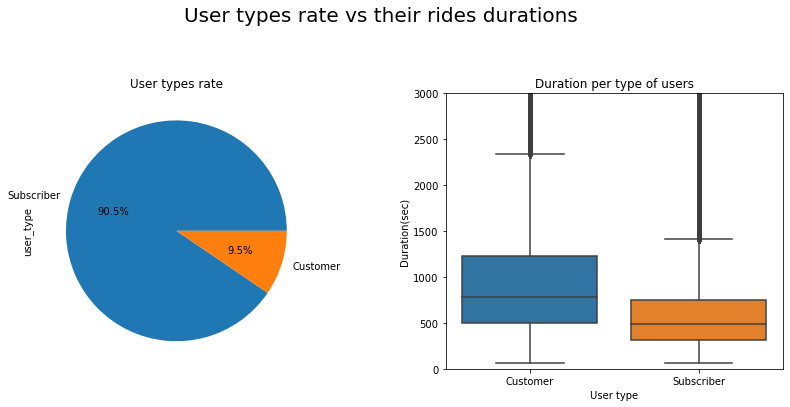

In [6]:
#draw a subplot to compare both visualizations drawn during exploration analysis
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
fig.suptitle("User types rate vs their rides durations",fontsize=20)
values=df.user_type.value_counts()
labelsList=["Subscriber","Customer"]
values.plot(kind='pie',autopct='%1.1f%%', labels=labelsList,ax = ax[0])
ax[0].set_title('User types rate')

sb.boxplot(data=df, x="user_type", y="duration_sec",ax = ax[1])
ax[1].set_title("Duration per type of users")
ax[1].set_ylabel("Duration(sec)")
ax[1].set_xlabel("User type")
ax[1].set_ylim([0, 3000])
fig.tight_layout(pad=3.0)
plt.show();

## Comparing users gender rate to their ride duration

>Although 74.6% of users are male, female and other take longer rides using Ford GoBike System.

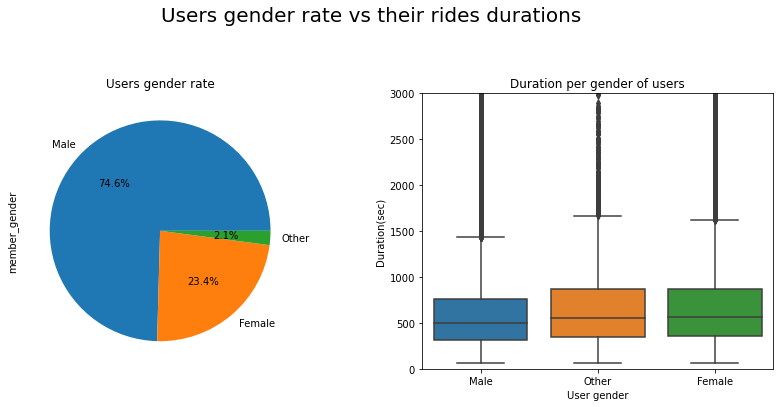

In [7]:
#draw a subplot to compare both visualizations drawn during exploration analysis
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
fig.suptitle("Users gender rate vs their rides durations",fontsize=20)

values=df.member_gender.value_counts()
labelsList=["Male","Female","Other"]
values.plot(kind='pie',autopct='%1.1f%%', labels=labelsList,ax = ax[0])
ax[0].set_title('Users gender rate')

sb.boxplot(data=df, x="member_gender", y="duration_sec",ax = ax[1])
ax[1].set_title("Duration per gender of users")
ax[1].set_ylabel("Duration(sec)")
ax[1].set_xlabel("User gender")
ax[1].set_ylim([0, 3000])
fig.tight_layout(pad=3.0)
plt.show();

## Comparing usage rate to the duration of trips per day of the week by user type
>Customers’ usage rate is almost the same but their rides’ duration is variable. Their longest rides happen to be in the weekends which represent the lowest usage rate. On the other hand, subscribers, the most users of the system, use the system in the opposite way

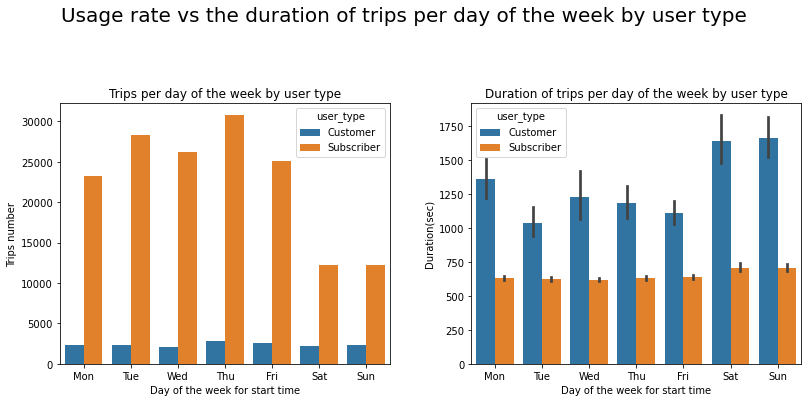

In [8]:
#draw a subplot to compare both visualizations drawn during exploration analysis
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
fig.suptitle("Usage rate vs the duration of trips per day of the week by user type",fontsize=20)

dayOfWeek=df.start_time.dt.dayofweek
l1=[0,1,2,3,4,5,6]
l2=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

sb.countplot(data=df, x=dayOfWeek, hue='user_type',ax = ax[0])
ax[0].set_xlabel('Day of the week for start time')
ax[0].set_ylabel('Trips number')
ax[0].set_title("Trips per day of the week by user type");
ax[0].set_xticks(l1, l2)

sb.barplot(data=df, x=dayOfWeek, y='duration_sec', hue='user_type',ax = ax[1])
ax[1].set_xlabel('Day of the week for start time')
ax[1].set_ylabel('Duration(sec)')
ax[1].set_title("Duration of trips per day of the week by user type");
ax[1].set_xticks(l1, l2)

fig.tight_layout(pad=3.5)
plt.show();

In [9]:
!jupyter nbconvert Part_II_Ford_GoBike_System_explanatory.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Ford_GoBike_System_explanatory.ipynb to slides
[NbConvertApp] Writing 685995 bytes to Part_II_Ford_GoBike_System_explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Toshiba\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Toshiba\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Toshiba\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Toshiba\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Toshiba\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.c